In [16]:
import pandas as pd
# Load the new CSV file
file_path_2 = 'HX711_Stats4.csv'
data_2 = pd.read_csv(file_path_2)

# Display the first few rows of the new data
data_2.head()


,Time,Delay,Readings,Measure
0,17:02:32:444,,NaN,NaN
1,17:02:32:444,1,16.0,3.85
2,17:02:32:604,1,16.0,-5.17
3,17:02:32:783,1,16.0,6.43
4,17:02:32:961,1,15.0,9.32


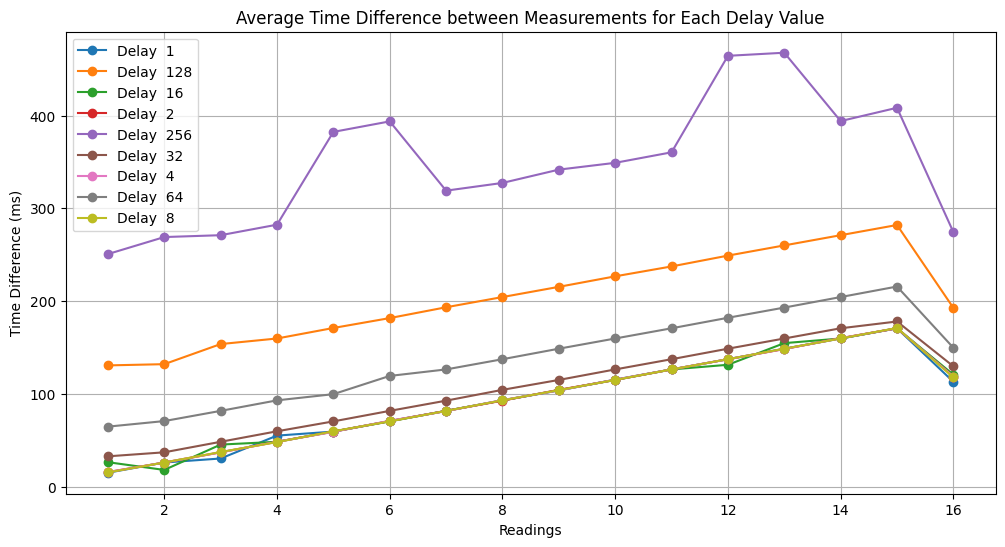

In [17]:
import matplotlib.pyplot as plt
# Strip whitespace from column names
data_2.columns = data_2.columns.str.strip()

# Convert Time to datetime format
data_2['Time'] = pd.to_datetime(data_2['Time'], format='%H:%M:%S:%f')

# Calculate time difference in milliseconds
data_2['Time_diff'] = data_2['Time'].diff().dt.total_seconds() * 1000

# Drop rows with NaN values in Delay or Readings
data_2 = data_2.dropna(subset=['Delay', 'Readings', 'Time_diff'])

# Group by Delay and Readings, then calculate the mean of Time_diff
data_2_avg = data_2.groupby(['Delay', 'Readings']).agg({'Time_diff': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
for delay in data_2_avg['Delay'].unique():
    subset = data_2_avg[data_2_avg['Delay'] == delay]
    plt.plot(subset['Readings'], subset['Time_diff'], label=f'Delay {delay}',marker='o')

plt.xlabel('Readings')
plt.ylabel('Time Difference (ms)')
plt.title('Average Time Difference between Measurements for Each Delay Value')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Strip whitespace from Delay values
data_2['Delay'] = data_2['Delay'].str.strip().astype(int)

# Filter the data for Delay 1 again
data_delay_1 = data_2[data_2['Delay'] == 8]

# Group by Readings and calculate the mean of Measure
data_delay_1_avg = data_delay_1.groupby(['Readings']).agg({'Measure': 'mean'}).reset_index()

# Verify the data for Delay 1
data_delay_1_avg.head(), data_delay_1_avg.describe()


(   Readings    Measure
 0       1.0  29.726667
 1       2.0  46.183333
 2       3.0  60.643333
 3       4.0  32.056667
 4       5.0  47.603333,
         Readings    Measure
 count  16.000000  16.000000
 mean    8.500000  41.374583
 std     4.760952   7.164224
 min     1.000000  29.726667
 25%     4.750000  36.714167
 50%     8.500000  42.218333
 75%    12.250000  43.777500
 max    16.000000  60.643333)

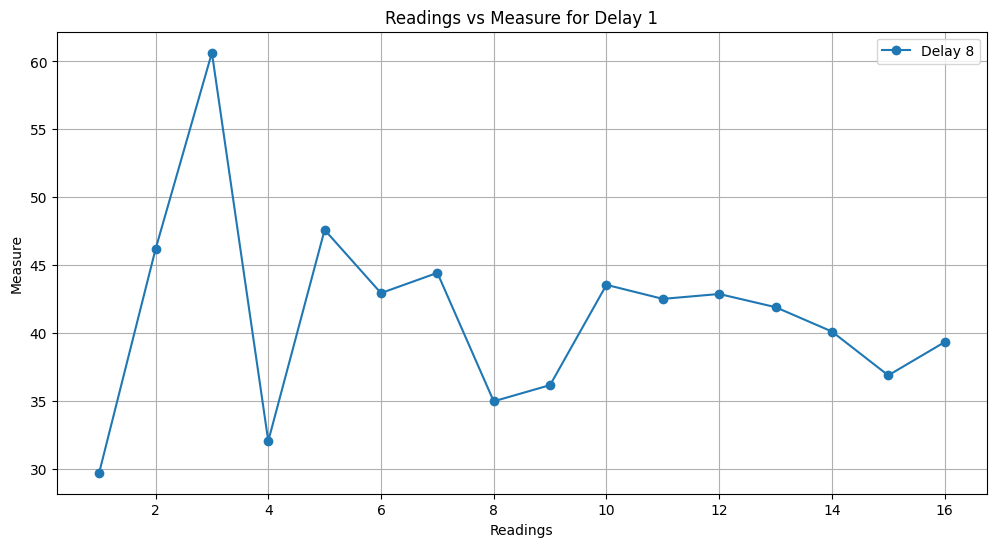

In [19]:
# Plot Readings vs Measure for Delay 1
plt.figure(figsize=(12, 6))
plt.plot(data_delay_1_avg['Readings'], data_delay_1_avg['Measure'], label='Delay 8', marker='o')

plt.xlabel('Readings')
plt.ylabel('Measure')
plt.title('Readings vs Measure for Delay 1')
plt.legend()
plt.grid(True)
plt.show()


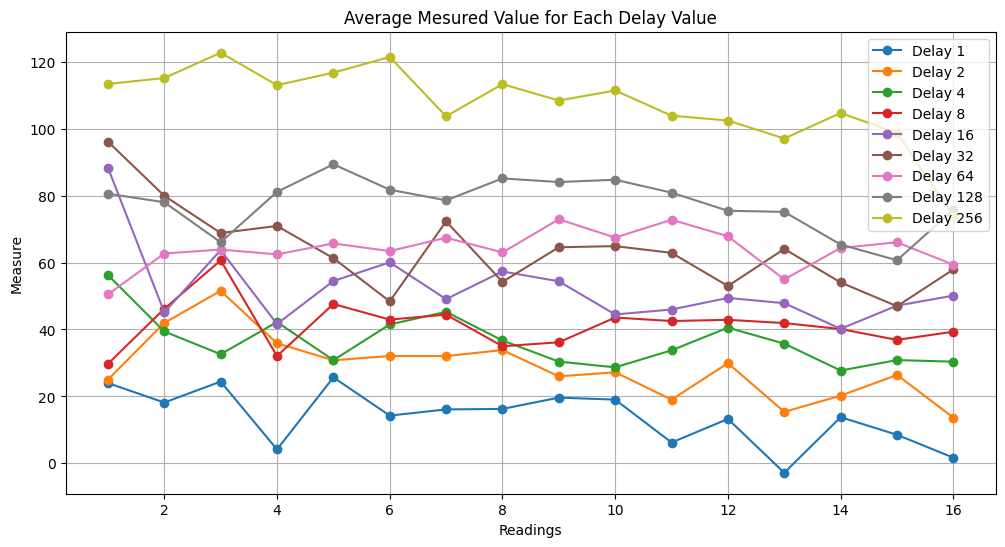

In [20]:
# Drop rows with NaN values in Delay or Readings
# data_2 = data_2.dropna(subset=['Delay', 'Readings', 'Time_diff'])

# Group by Delay and Readings, then calculate the mean of Time_diff
data_2_avg_M = data_2.groupby(['Delay', 'Readings']).agg({'Measure': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
for delay in data_2_avg_M['Delay'].unique():
    subset = data_2_avg_M[data_2_avg_M['Delay'] == delay]
    plt.plot(subset['Readings'], subset['Measure'], label=f'Delay {delay}', marker='o')

plt.xlabel('Readings')
plt.ylabel('Measure')
plt.title('Average Mesured Value for Each Delay Value')
plt.legend()
plt.grid(True)
plt.show()